<a href="https://colab.research.google.com/github/MJSinMJ/SDATP/blob/main/sda_jinseo_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리 1
1. 한글은 전부 영어로 변환
2. train.csv와 building_info.csv를 건물번호를 기준으로 병합
3. train.csv에서 num_date_time = 건물번호 + 일시, 중복된 데이터이므로 열 제거
4. date_time 을 년, 월, 주, 시간으로 분리

In [1]:
# module import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df= pd.read_csv('/content/drive/MyDrive/dacon/전력예측_sda/train.csv')
building_info = pd.read_csv('/content/drive/MyDrive/dacon/전력예측_sda/building_info.csv')


In [4]:
# data set check
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [5]:
building_info.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [6]:
# rename kor to eng
train_df = train_df.rename(columns={
    '건물번호': 'building_id',
    '일시': 'date_time',
    '기온(C)': 'temp',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption',
})
train_df.drop('num_date_time', axis=1, inplace=True)
train_df.head()

,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [7]:
building_info = building_info.rename(columns={
    '건물번호': 'building_id',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_cap',
    'ESS저장용량(kWh)': 'ess_cap',
    'PCS용량(kW)': 'pcs_cap',
})
translation_dict = {
    '건물기타': 'Other Buildings',
    '공공': 'Public',
    '대학교': 'University',
    '데이터센터': 'Data Center',
    '백화점및아울렛': 'Department Store and Outlet',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '지식산업센터': 'Knowledge Industry Center',
    '할인마트': 'Discount Mart',
    '호텔및리조트': 'Hotel and Resort'
}
building_info['building_type'] = building_info['building_type'].replace(translation_dict)
building_info.head()

,building_id,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap
0,1,Other Buildings,110634.00,39570.00,-,-,-
1,2,Other Buildings,122233.47,99000.00,-,-,-
2,3,Other Buildings,171243.00,113950.00,40,-,-
3,4,Other Buildings,74312.98,34419.62,60,-,-
4,5,Other Buildings,205884.00,150000.00,-,2557,1000


In [8]:
train_df = pd.merge(train_df, building_info, on='building_id', how='left')

In [9]:
train_df.head()

,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.0,39570.0,-,-,-
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.0,39570.0,-,-,-
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.0,39570.0,-,-,-
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.0,39570.0,-,-,-
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.0,39570.0,-,-,-


In [10]:
train_df['date_time'] = pd.to_datetime(train_df['date_time'], format='%Y%m%d %H')
train_df['hour'] = train_df['date_time'].dt.hour
train_df['day'] = train_df['date_time'].dt.day
train_df['month'] = train_df['date_time'].dt.month
train_df['year'] = train_df['date_time'].dt.year
train_df.head()

,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap,hour,day,month,year
0,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.0,39570.0,-,-,-,0,1,6,2022
1,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.0,39570.0,-,-,-,1,1,6,2022
2,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.0,39570.0,-,-,-,2,1,6,2022
3,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.0,39570.0,-,-,-,3,1,6,2022
4,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.0,39570.0,-,-,-,4,1,6,2022


# 데이터 전처리 2
1. 결측치 check
2. outlier check

In [11]:
train_df.isna().sum()

building_id               0
date_time                 0
temp                      0
rainfall             160069
windspeed                19
humidity                  9
sunshine              75182
solar_radiation       87913
power_consumption         0
building_type             0
total_area                0
cooling_area              0
solar_power_cap           0
ess_cap                   0
pcs_cap                   0
hour                      0
day                       0
month                     0
year                      0
dtype: int64

In [12]:
len(train_df)

204000

In [13]:
print(len(train_df[train_df['solar_power_cap'] == '-']))
print(len(train_df[train_df['ess_cap'] == '-']))
print(len(train_df[train_df['pcs_cap'] == '-']))

130560
193800
193800


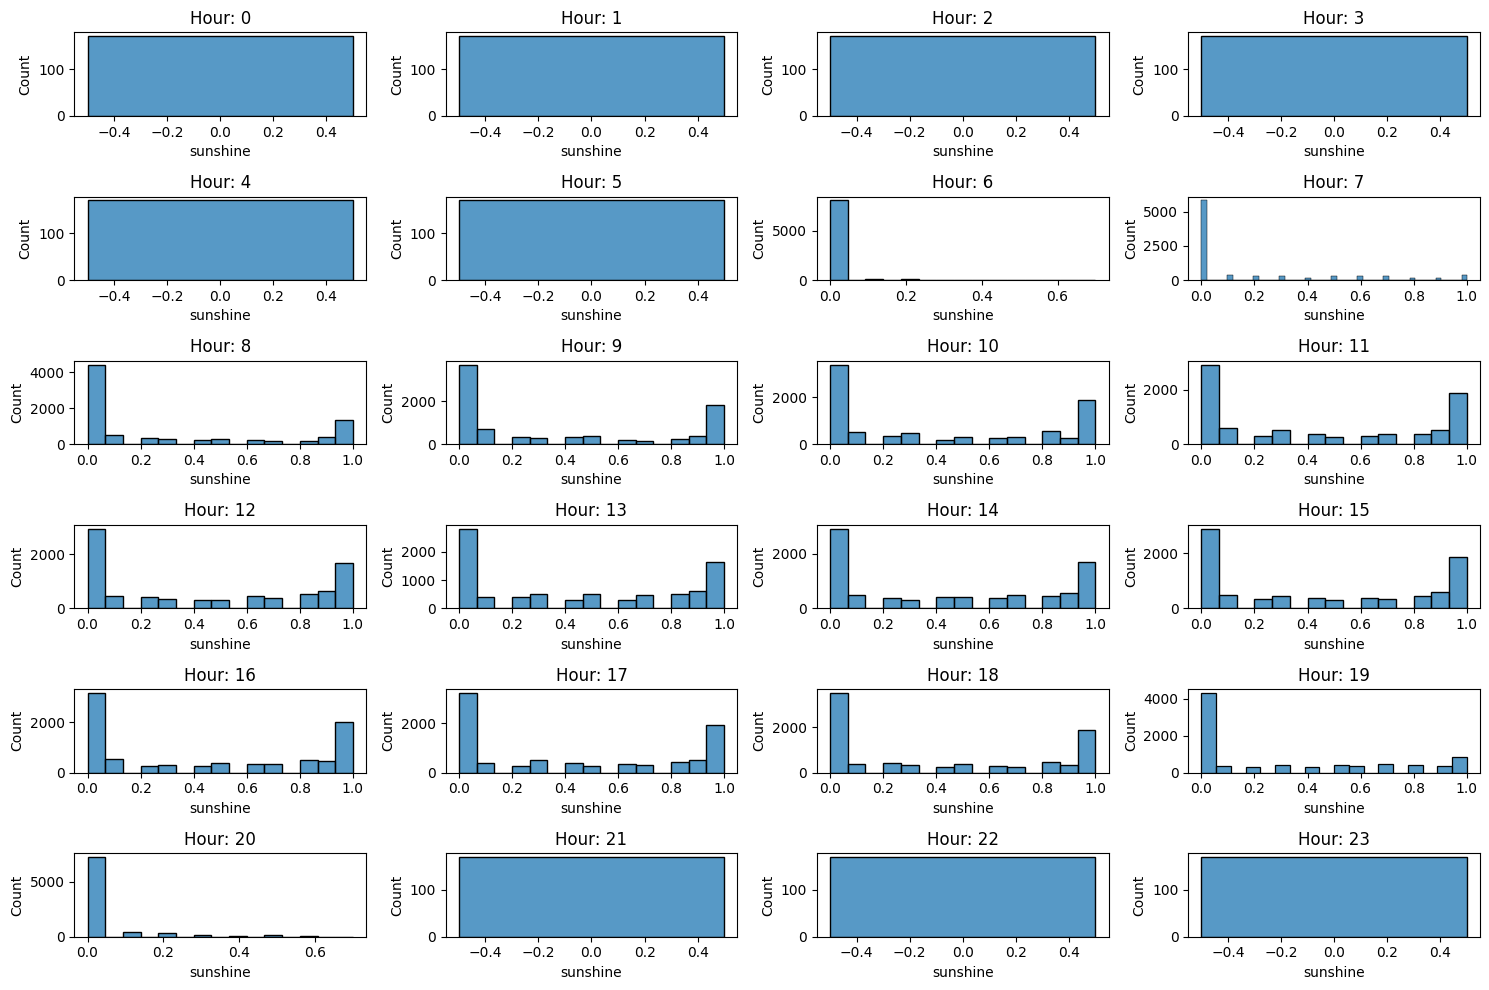

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 4, figsize=(15, 10))
axs = axs.ravel()

for i in range(24):
    sns.histplot(train_df[train_df.hour == i]['sunshine'], ax=axs[i])
    axs[i].set_title(f'Hour: {i}')

plt.tight_layout()

<Axes: xlabel='rainfall', ylabel='Count'>

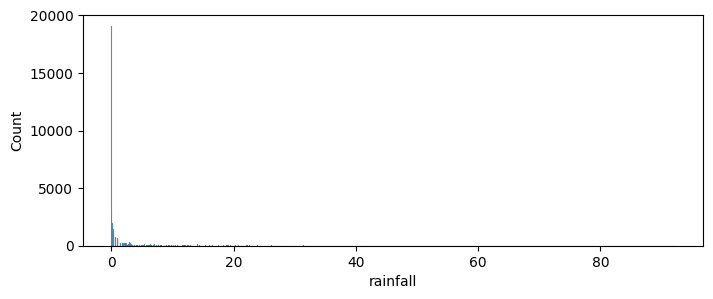

In [15]:
plt.figure(figsize=(8, 3))
sns.histplot(train_df['rainfall'])

sunshin, solar_radiation: 정확하게 보간할 수 있는 방법이 없다고 판단 => drop  
rainfall: 대부분의 데이터가 0임 => .fillna(0)  
solar_power_cap, ess_cap, pcs_cap: 측정도구가 없지만 0으로 채우는 것이 맞는가? => X라고 판단

In [16]:
train_df = train_df.drop(['solar_power_cap', 'ess_cap', 'pcs_cap', 'sunshine', 'solar_radiation'], axis=1)

In [17]:
train_df['rainfall'].fillna(0, inplace=True)

In [18]:
train_df.isna().sum()

building_id           0
date_time             0
temp                  0
rainfall              0
windspeed            19
humidity              9
power_consumption     0
building_type         0
total_area            0
cooling_area          0
hour                  0
day                   0
month                 0
year                  0
dtype: int64

windspeed, humidity의 경우 값을 어떻게 보간할까?
=> 근처 값으로 덮기 or 값 평균 뭐가 더 나을지에 대한 고민

<Axes: xlabel='windspeed', ylabel='Count'>

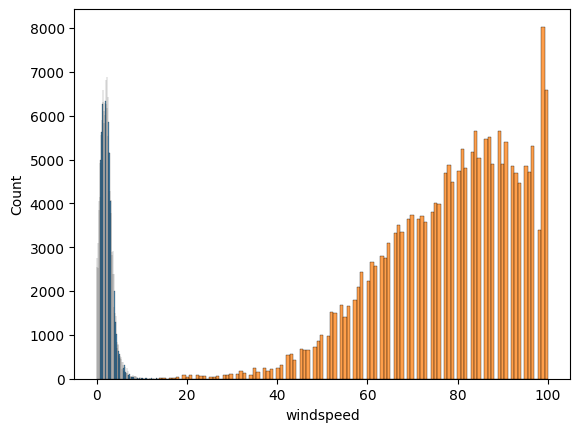

In [19]:
sns.histplot(train_df['windspeed'])
sns.histplot(train_df['humidity'])

In [20]:
train_df['windspeed'].fillna(method='ffill', inplace=True)
train_df['humidity'].fillna(method='ffill', inplace=True)

In [21]:
train_df.isna().sum()

building_id          0
date_time            0
temp                 0
rainfall             0
windspeed            0
humidity             0
power_consumption    0
building_type        0
total_area           0
cooling_area         0
hour                 0
day                  0
month                0
year                 0
dtype: int64

# EDA & 조정

In [22]:
# 년기준 일 평균 소비전력
train_df['day_of_year'] = train_df['date_time'].dt.dayofyear
mean_power_by_day_of_year = train_df.groupby('day_of_year')['power_consumption'].mean()
# 년기준 시간평균 소비전력
train_df['hour_of_year'] = train_df['date_time'].dt.hour + (train_df['date_time'].dt.dayofyear - 1) * 24
mean_power_by_hour_of_year = train_df.groupby('hour_of_year')['power_consumption'].mean()

# 년기준 월평균 소비전력
mean_power_by_month = train_df.groupby('month')['power_consumption'].mean()

# 일기준 시간 평균 소비전력
mean_power_by_hour = train_df.groupby('hour')['power_consumption'].mean()

# 월기준 시간 평균 소비전력
mean_power_by_day = train_df.groupby('day')['power_consumption'].mean()

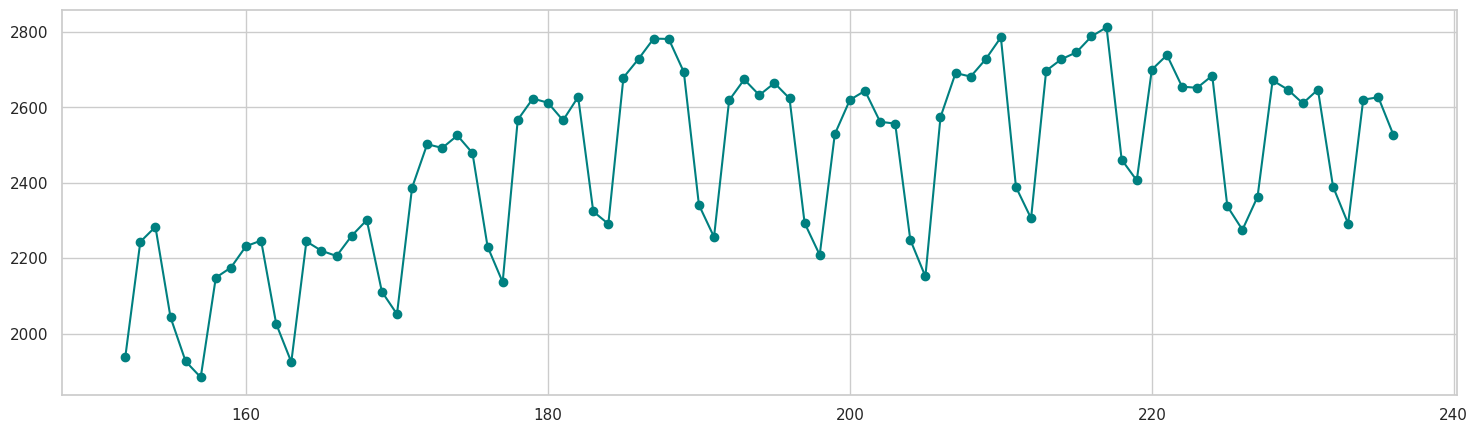

In [23]:
# day of the year에 대한 일 평균 소비전력 그래프
plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year.index, mean_power_by_day_of_year.values, color='teal', marker='o', linestyle='-')
plt.show()

휴일에 주기적으로 전력소모량이 낮은 것을 확인할 수 있음 => 따로 파생변수 생성

In [24]:
train_df['holiday'] = train_df['day_of_year'].apply(lambda x: True if x % 7 == 1 or x % 7 == 2 else False)

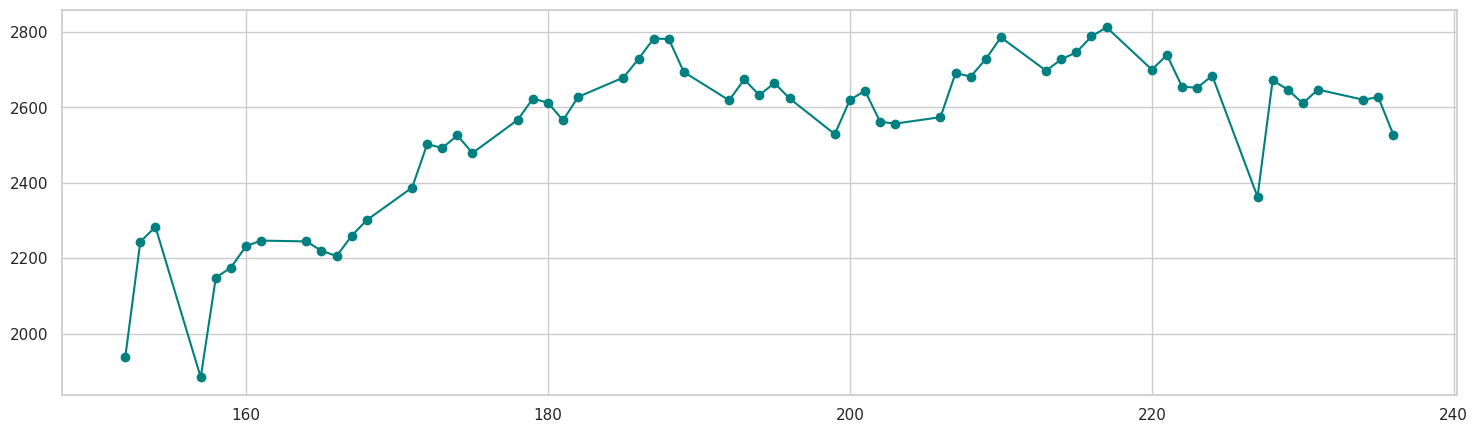

In [25]:
# holiday == False graph
mean_power_by_day_of_year_holidaycut = train_df[train_df['holiday'] == False].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_holidaycut.index, mean_power_by_day_of_year_holidaycut.values, color='teal', marker='o', linestyle='-')
plt.show()

(6월 1일 지방선거, 6월 6일 현충일, 8월 15일 광복절 == 휴일)에 전력소모량이 낮은 것을 확인할 수 있음 => holiday로 분류

In [26]:
train_df.loc[(train_df['month'] == 6) & (train_df['day'] == 1), 'holiday'] = True
train_df.loc[(train_df['month'] == 6) & (train_df['day'] == 6), 'holiday'] = True
train_df.loc[(train_df['month'] == 8) & (train_df['day'] == 15), 'holiday'] = True

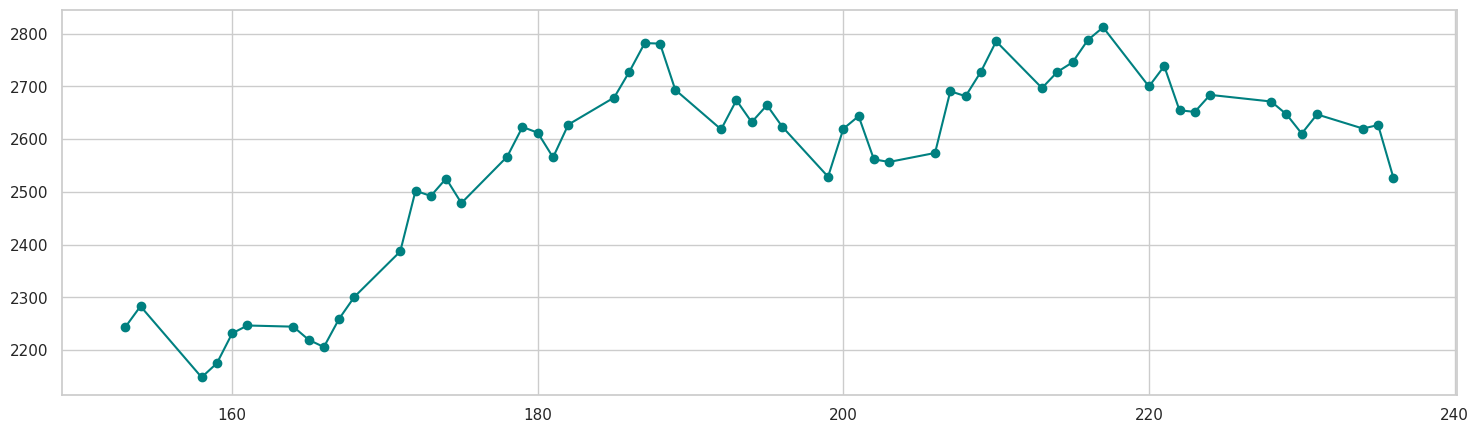

In [27]:
# 법정공휴일 제거
mean_power_by_day_of_year_holidaycut = train_df[train_df['holiday'] == False].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_holidaycut.index, mean_power_by_day_of_year_holidaycut.values, color='teal', marker='o', linestyle='-')
plt.show()

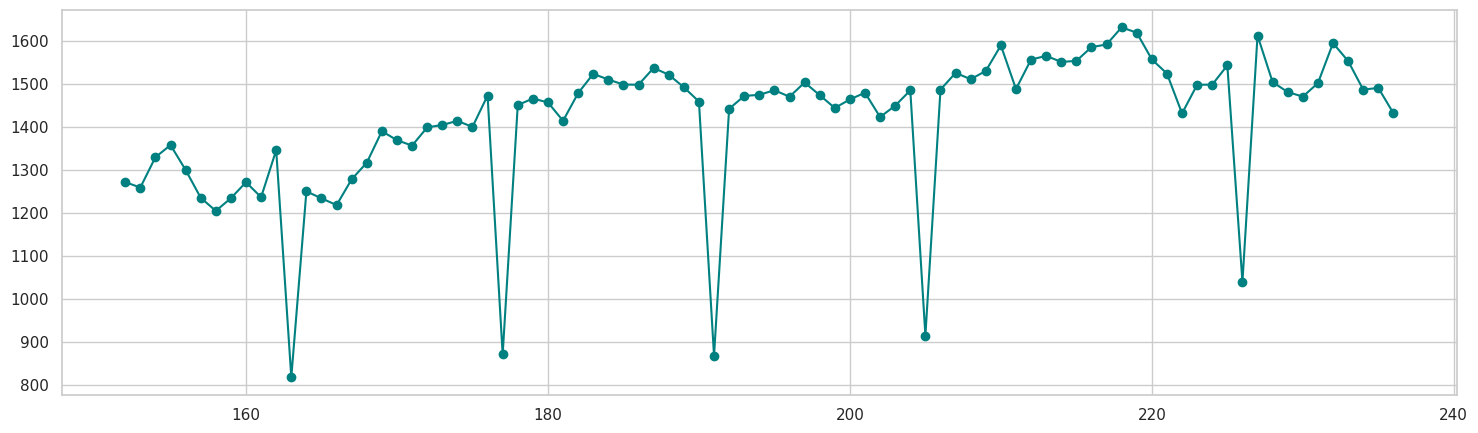

In [28]:
# 대형마트 체크
mean_power_by_day_of_year_market_nh = train_df[(train_df['building_type'] == 'Discount Mart')].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_market_nh.index, mean_power_by_day_of_year_market_nh.values, color='teal', marker='o', linestyle='-')
plt.show()

대형마트는 주말에도 영업을 함, 단, 2, 4째주 일요일의 경우 휴일이므로 이 부분만 수정

In [29]:
train_df.loc[(train_df['building_type'] == 'Discount Mart') & (train_df['month'] == 6) & (train_df['day'] == 12), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Discount Mart') & (train_df['month'] == 6) & (train_df['day'] == 26), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Discount Mart') & (train_df['month'] == 7) & (train_df['day'] == 10), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Discount Mart') & (train_df['month'] == 7) & (train_df['day'] == 24), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Discount Mart') & (train_df['month'] == 8) & (train_df['day'] == 14), 'holiday'] = True

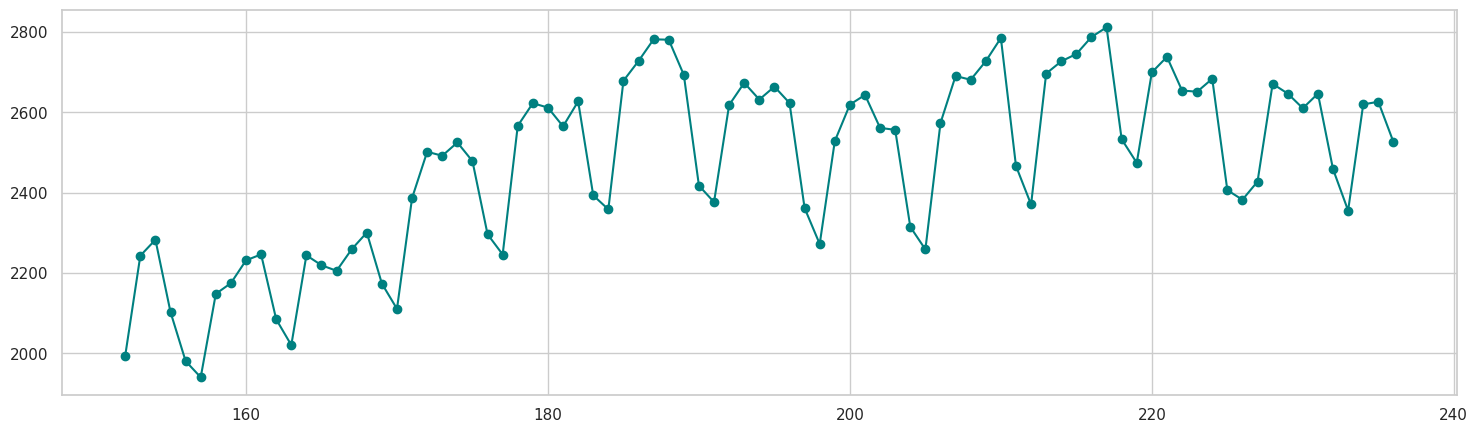

In [30]:
# 휴무일 제거 후
mean_power_by_day_of_year_market_after = train_df[(train_df['building_type'] == 'Discount Mart') & train_df['holiday'] == False].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_market_after.index, mean_power_by_day_of_year_market_after.values, color='teal', marker='o', linestyle='-')
plt.show()

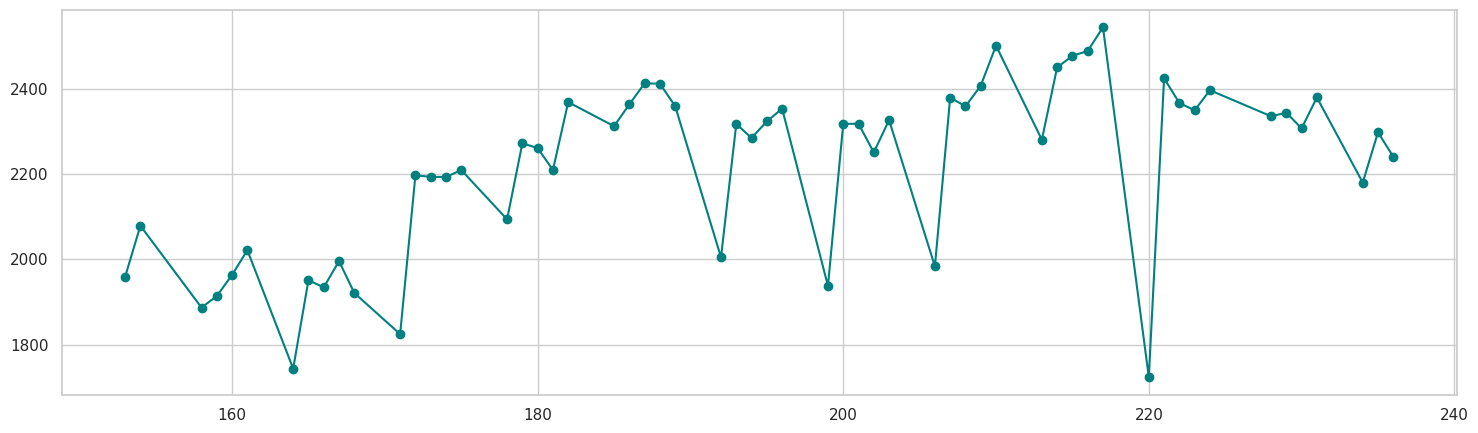

In [31]:
# 백화점 체크
mean_power_by_day_of_year_dp = train_df[(train_df['building_type'] == 'Department Store and Outlet') & (train_df['holiday'] == False)].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_dp.index, mean_power_by_day_of_year_dp.values, color='teal', marker='o', linestyle='-')
plt.show()

휴일이 아닌데도 현저하게 전력소모량이 낮은 날이 있음 => 임시휴무일

In [32]:
train_df.loc[(train_df['building_type'] == 'Department Store and Outlet') & (train_df['day_of_year'] == 164), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Department Store and Outlet') & (train_df['day_of_year'] == 171), 'holiday'] = True
train_df.loc[(train_df['building_type'] == 'Department Store and Outlet') & (train_df['day_of_year'] == 220), 'holiday'] = True

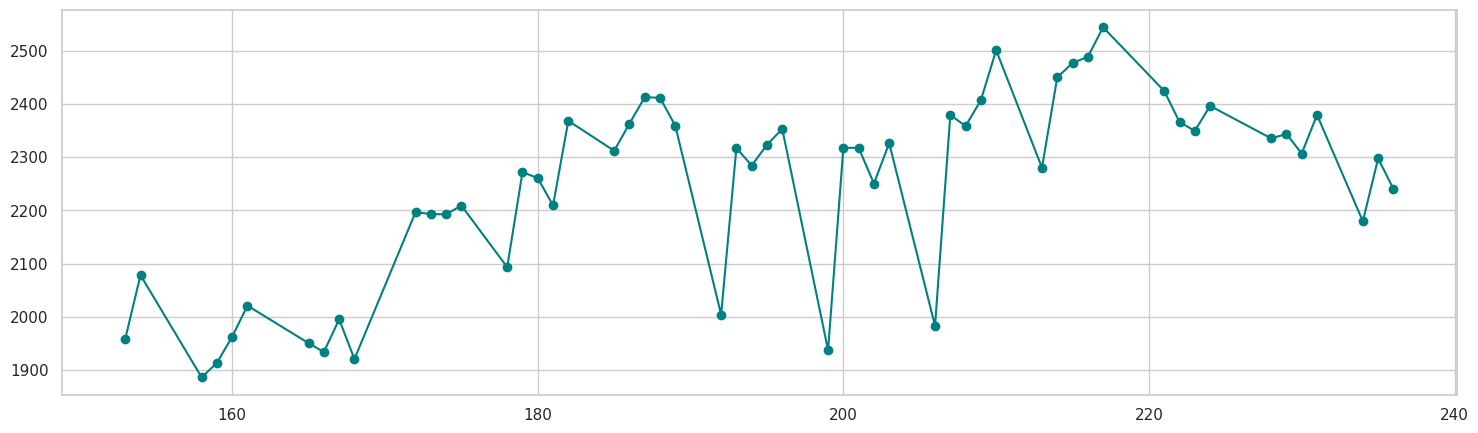

In [33]:
# 백화점 임시휴무일 제거 후
mean_power_by_day_of_year_dp = train_df[(train_df['building_type'] == 'Department Store and Outlet') & (train_df['holiday'] == False)].groupby('day_of_year')['power_consumption'].mean()

plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")
plt.plot(mean_power_by_day_of_year_dp.index, mean_power_by_day_of_year_dp.values, color='teal', marker='o', linestyle='-')
plt.show()

전체적인 그래프 체크

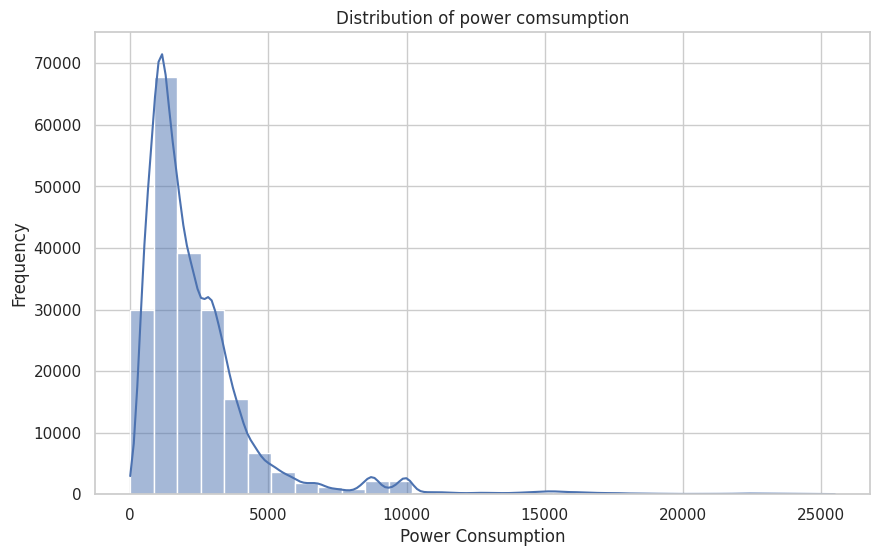

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['power_consumption'], bins=30, kde=True)
plt.title('Distribution of power comsumption')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.show()

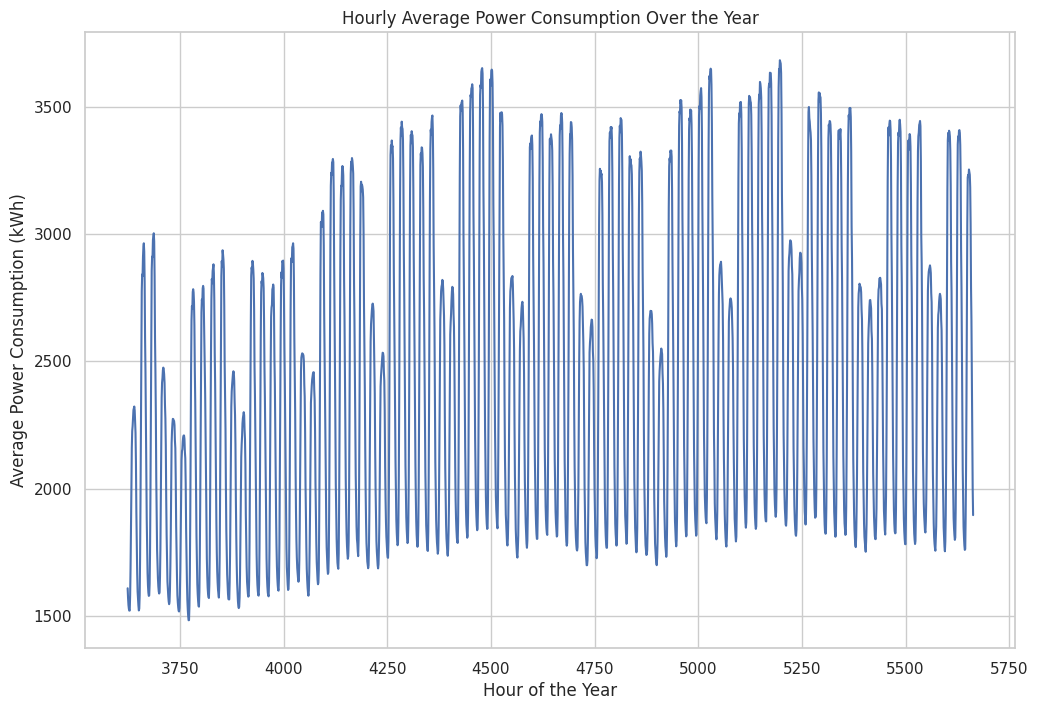

In [35]:
# 년기준 시간평균 소비전력 그래프
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x=mean_power_by_hour_of_year.index, y=mean_power_by_hour_of_year.values)
plt.title('Hourly Average Power Consumption Over the Year')
plt.xlabel('Hour of the Year')
plt.ylabel('Average Power Consumption (kWh)')
plt.show()

<ipython-input-36-7c154eddd266>:21: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  plt.tight_layout()
<ipython-input-36-7c154eddd266>:21: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from current font.
  plt.tight_layout()
<ipython-input-36-7c154eddd266>:21: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
<ipython-input-36-7c154eddd266>:21: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
<ipython-input-36-7c154eddd266>:21: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
<ipython-input-36-7c154eddd266>:21: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-36-7c154eddd266>:21: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-36-7c154eddd266>:21: UserWarning: Glyp

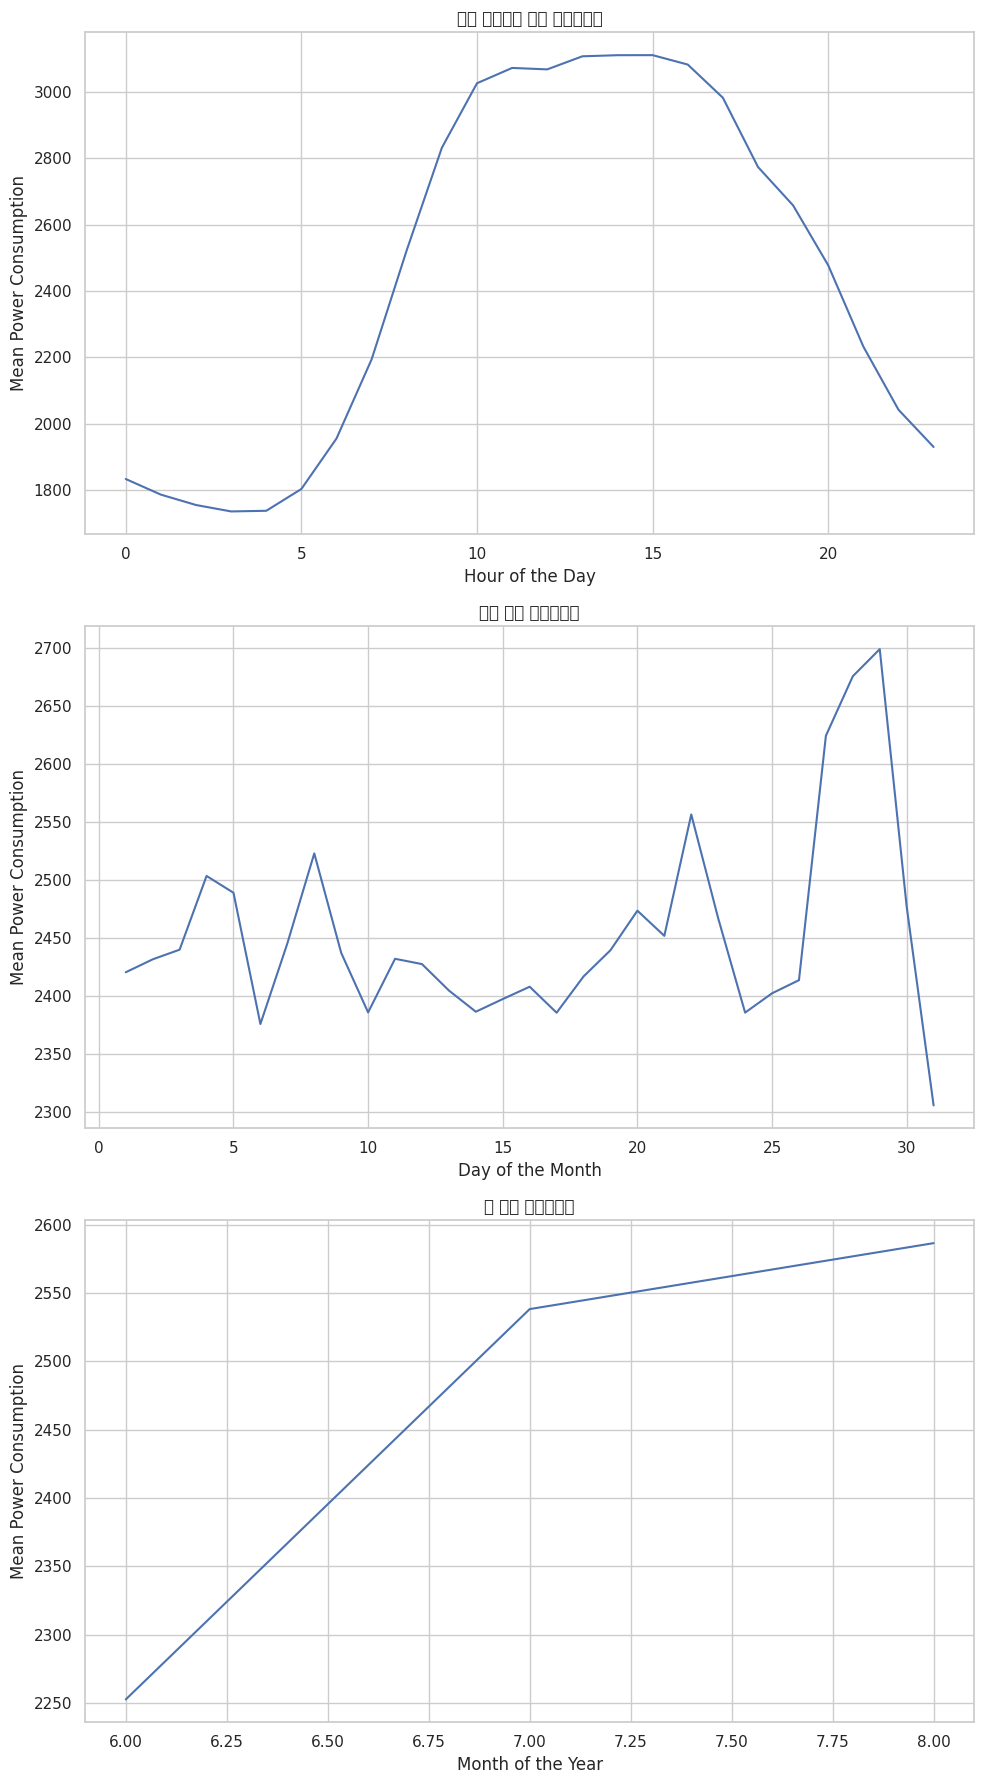

In [36]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot mean power consumption by hour of the day
sns.lineplot(x=mean_power_by_hour.index, y=mean_power_by_hour.values, ax=axs[0])
axs[0].set_title('하루 시간대별 평균 전력사용량')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Mean Power Consumption')

# Plot mean power consumption by day of the month
sns.lineplot(x=mean_power_by_day.index, y=mean_power_by_day.values, ax=axs[1])
axs[1].set_title('일일 평균 전력사용량')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Mean Power Consumption')

# 년기준 월평균 소비전력
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values, ax=axs[2])
axs[2].set_title('월 평균 전력사용량')
axs[2].set_xlabel('Month of the Year')
axs[2].set_ylabel('Mean Power Consumption')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

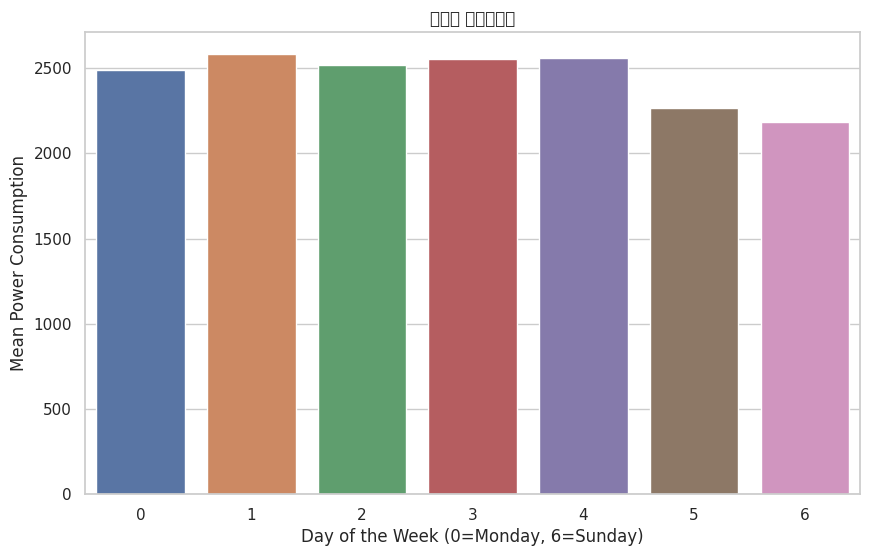

In [37]:
train_df['day_of_week'] = train_df['date_time'].dt.dayofweek

# 요일별 전력평균
mean_power_by_day_of_week = train_df.groupby('day_of_week')['power_consumption'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_power_by_day_of_week.index, y=mean_power_by_day_of_week.values)
plt.title('요일별 전력사용량')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Mean Power Consumption')
plt.show()

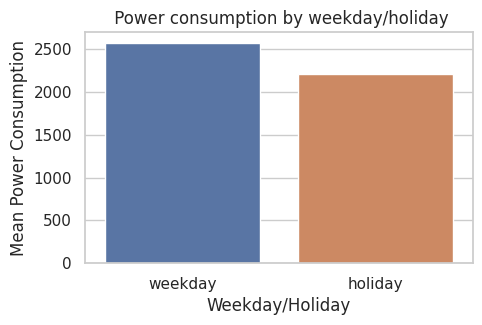

In [38]:
# 평일/휴일 전력사용량 차이
mean_power_by_holiday = train_df.groupby('holiday')['power_consumption'].mean()

plt.figure(figsize=(5, 3))
sns.barplot(x=mean_power_by_holiday.index, y=mean_power_by_holiday.values)
plt.xticks([0, 1], ['weekday', 'holiday'])
plt.title(' Power consumption by weekday/holiday')
plt.xlabel('Weekday/Holiday')
plt.ylabel('Mean Power Consumption')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

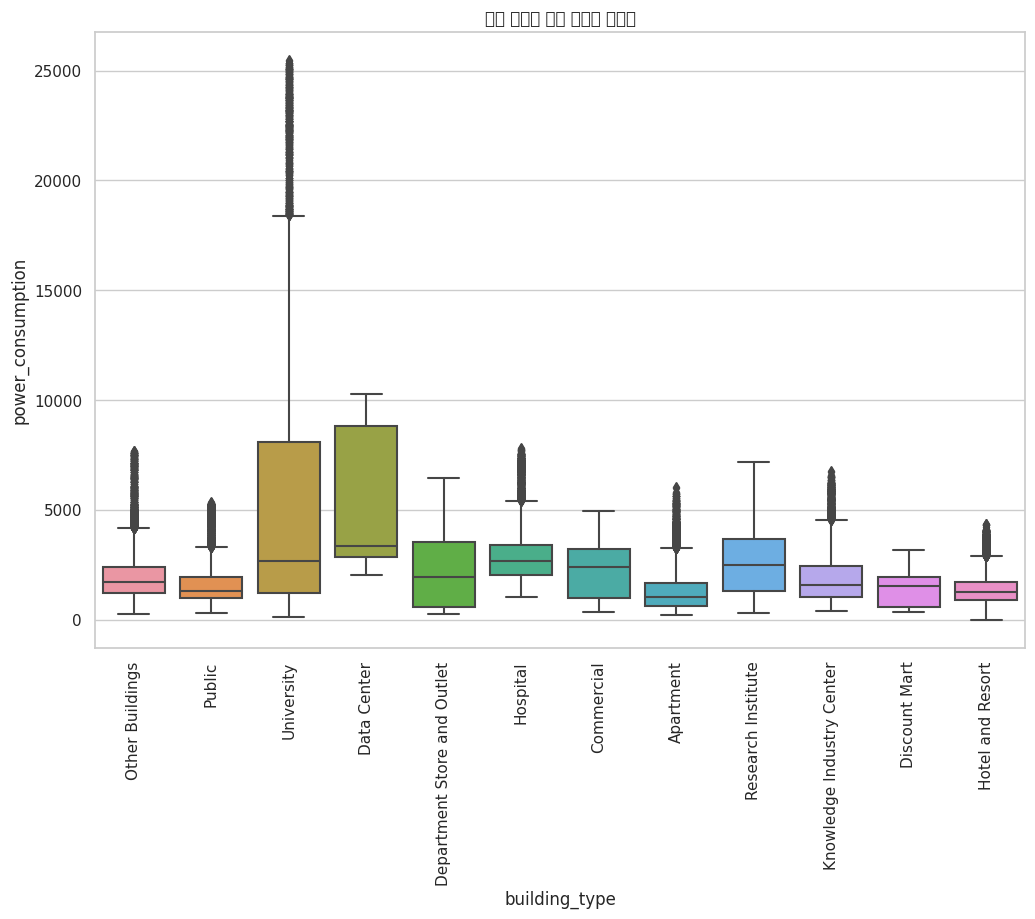

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='building_type', y='power_consumption', data=train_df)
plt.title('건물 유형에 따른 에너지 소비량')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

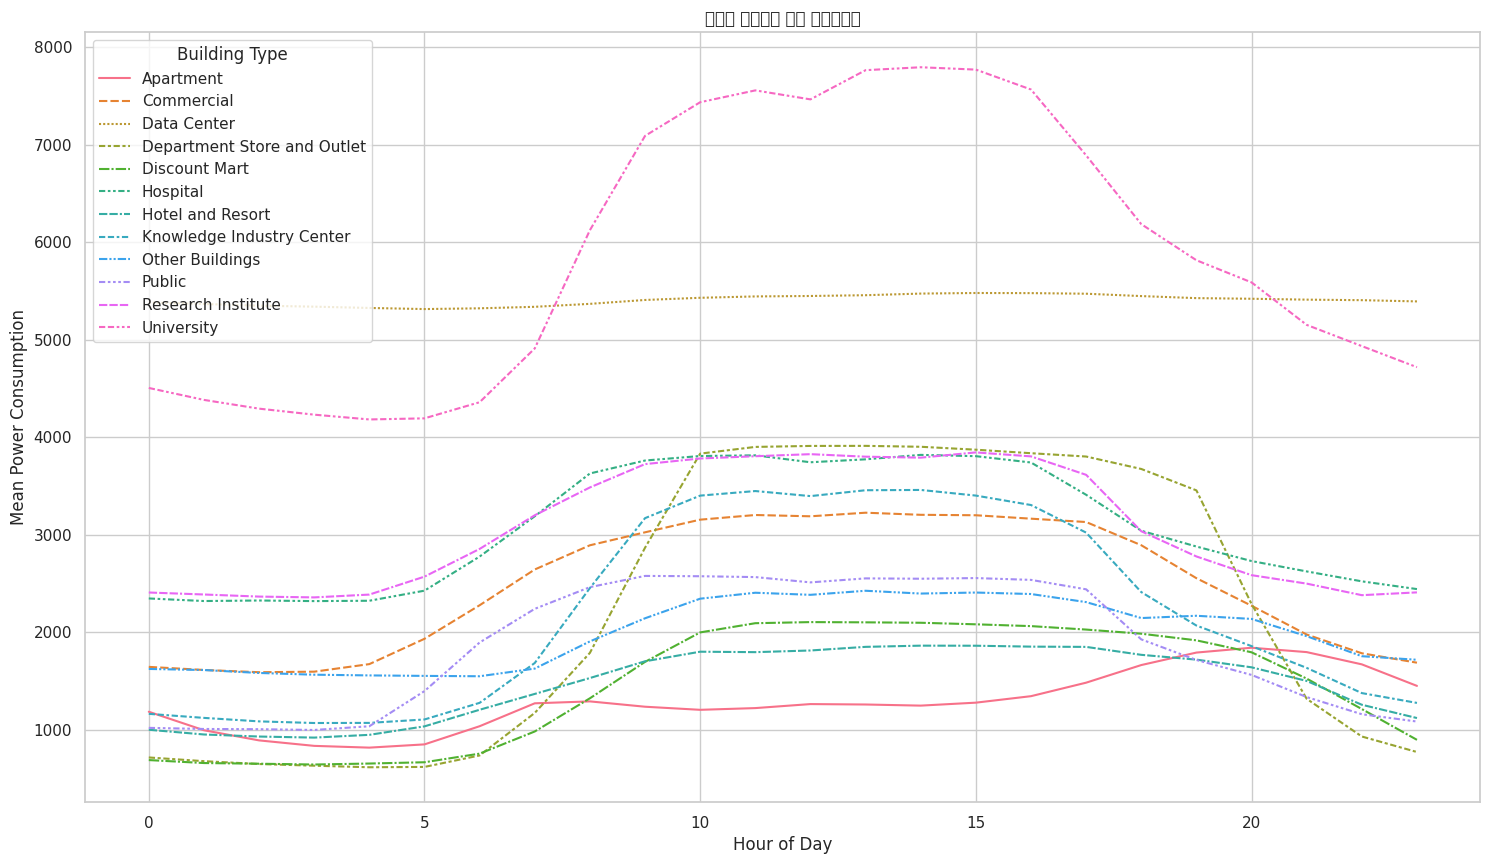

In [40]:
mean_power_by_hour_building = train_df[train_df['holiday'] == False].groupby(['hour', 'building_type'])['power_consumption'].mean().reset_index()

pivot_df = mean_power_by_hour_building.pivot(index='hour', columns='building_type', values='power_consumption')

plt.figure(figsize=(18, 10))
sns.lineplot(data=pivot_df)
plt.title('건물별 시간대별 평균 전력사용량')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Power Consumption')
plt.legend(title='Building Type')
plt.show()
# 휴일 제외

1. Data Center 의 경우 일정한 전력사용량을 보여줌
2. University에서 매우 큰 전력사용량을 보여줌
3. Apartment를 제외한 대부분의 건물은 주 활동 시간대 (08 ~ 18)에 조금 더 높은 전력사용량을 보여줌
4. Apartment의 경우 퇴근 이후 (18~)에 전력사용량이 늘어나는 것을 확인할 수 있음

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

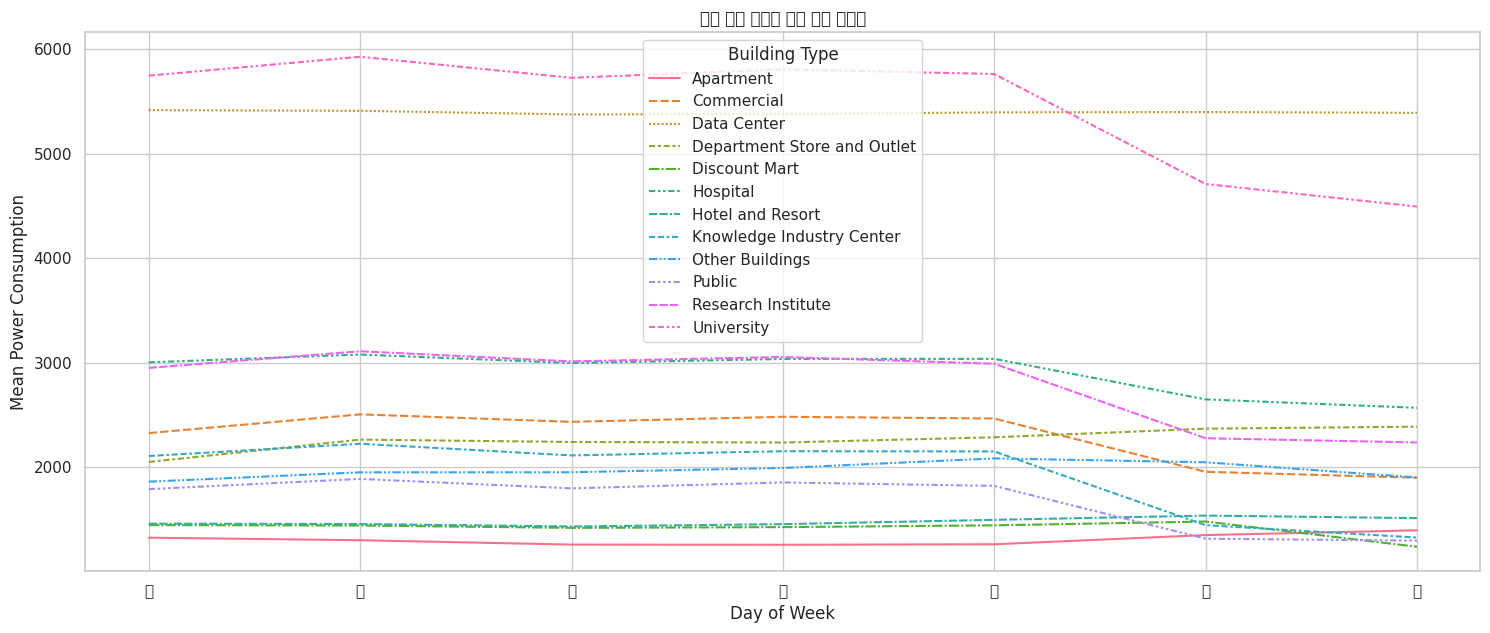

In [41]:
mean_power_by_day_building = train_df.groupby(['day_of_week', 'building_type'])['power_consumption'].mean().reset_index()

pivot_df_day = mean_power_by_day_building.pivot(index='day_of_week', columns='building_type', values='power_consumption')

day_names = ['월', '화', '수', '목', '금', '토', '일']
pivot_df_day.index = day_names

plt.figure(figsize=(18, 7))
sns.lineplot(data=pivot_df_day)
plt.title('주별 건물 유형별 평균 전력 소비량')
plt.xlabel('Day of Week')
plt.ylabel('Mean Power Consumption')
plt.legend(title='Building Type')
plt.show()

Universiry, Research Institute 등, 주말에 전력사용량이 줄어드는 건물들을 확인할 수 있고
Apartment와 같이 주말에 전력사용량이 늘어나는 건물들을 확인할 수 있다

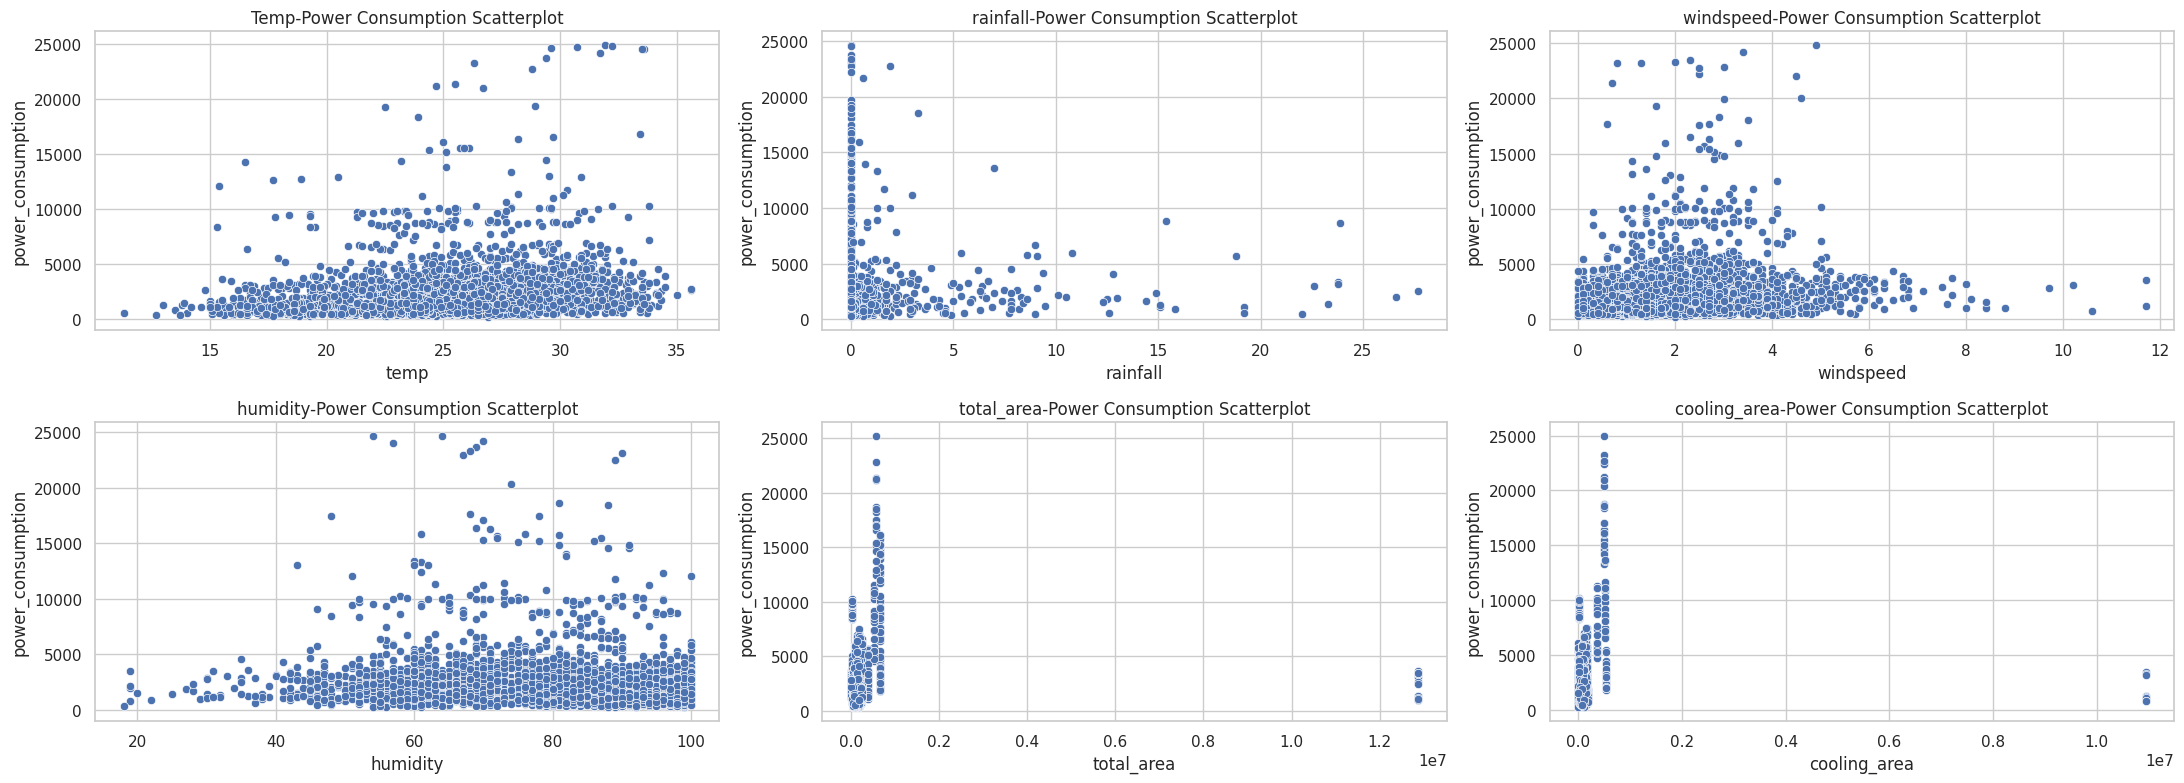

In [42]:
# 수치형 변수 별 전력사용량 관계
fig, axs = plt.subplots(2, 3, figsize=(22, 8))

sns.scatterplot(x='temp', y='power_consumption', data=train_df.sample(3000), ax=axs[0,0])
axs[0,0].set_title('Temp-Power Consumption Scatterplot')
sns.scatterplot(x='rainfall', y='power_consumption', data=train_df.sample(3000), ax=axs[0,1])
axs[0,1].set_title('rainfall-Power Consumption Scatterplot')
sns.scatterplot(x='windspeed', y='power_consumption', data=train_df.sample(3000), ax=axs[0,2])
axs[0,2].set_title('windspeed-Power Consumption Scatterplot')
sns.scatterplot(x='humidity', y='power_consumption', data=train_df.sample(3000), ax=axs[1,0])
axs[1,0].set_title('humidity-Power Consumption Scatterplot')
sns.scatterplot(x='total_area', y='power_consumption', data=train_df.sample(3000), ax=axs[1,1])
axs[1,1].set_title('total_area-Power Consumption Scatterplot')
sns.scatterplot(x='cooling_area', y='power_consumption', data=train_df.sample(3000), ax=axs[1,2])
axs[1,2].set_title('cooling_area-Power Consumption Scatterplot')

plt.tight_layout()
plt.show()

# Hypothesis testing

정규성 / 이상치 확인등 다른 분들이 작성한 코드로 확인

In [43]:
#상관분석으로 각 기후 변수와 전력 consumption의 상관관계
#Null Hypothesis (H0): 기후 변수와 전력 소비량 사이에는 상관관계가 없다.
#Alternative Hypothesis (HA): 기후 변수와 전력 소비량 사이에는 상관관계가 있다.
#pearsonr or spearsmanr?
#correlation값만 확인하면 잘못된 결론 낼 수 있으므로 항상 plot확인하여 data에 cluster/ outlier / nonlinearity먼저확인

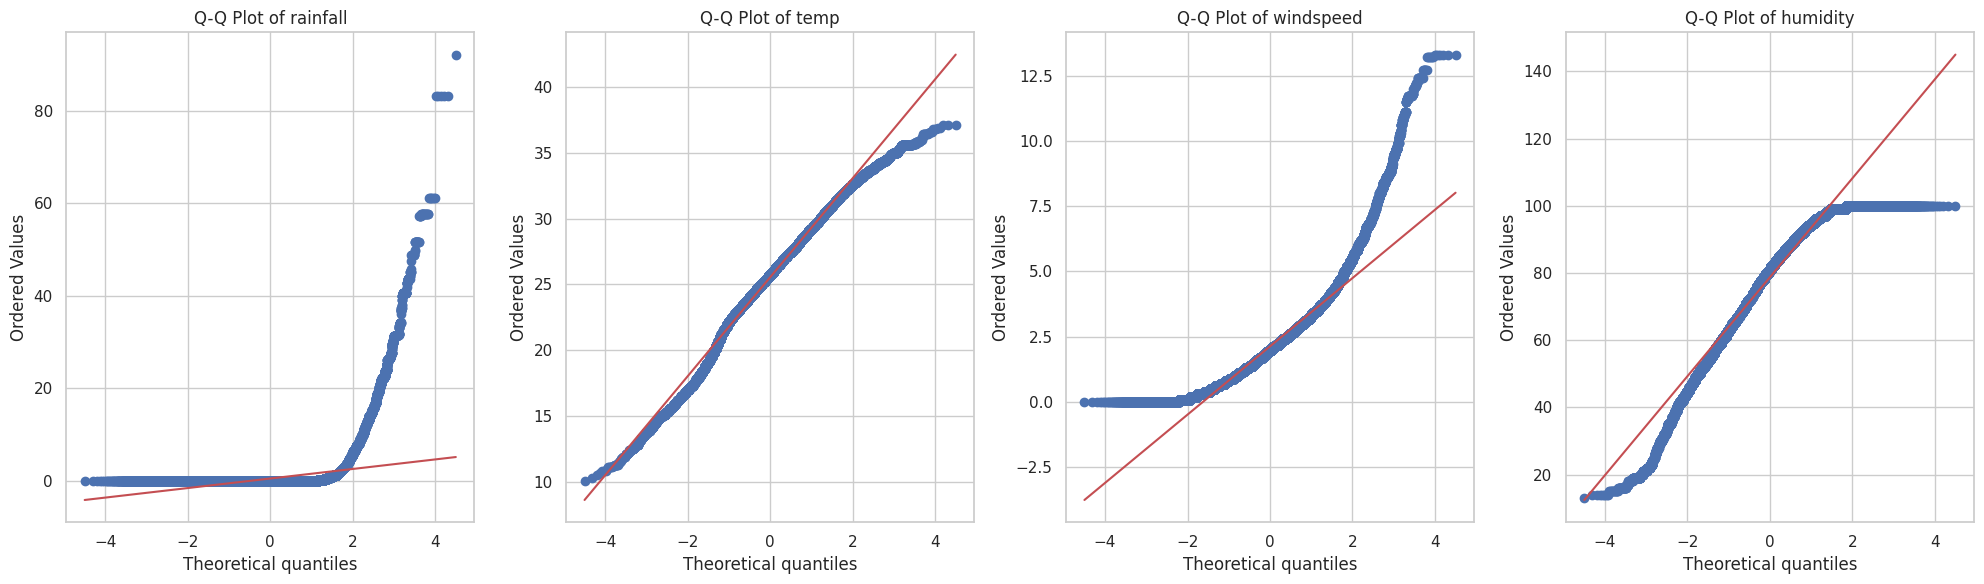

In [44]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_qq(dataframe, columns):
    fig, axs = plt.subplots(1, len(columns), figsize=(5 * len(columns), 6))

    for i, col in enumerate(columns):
        stats.probplot(dataframe[col], dist="norm", plot=axs[i])
        axs[i].set_title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

plot_qq(train_df, ['rainfall', 'temp', 'windspeed', 'humidity'])
#정규성 따르지 않음. 그나마 temp랑 따른다.

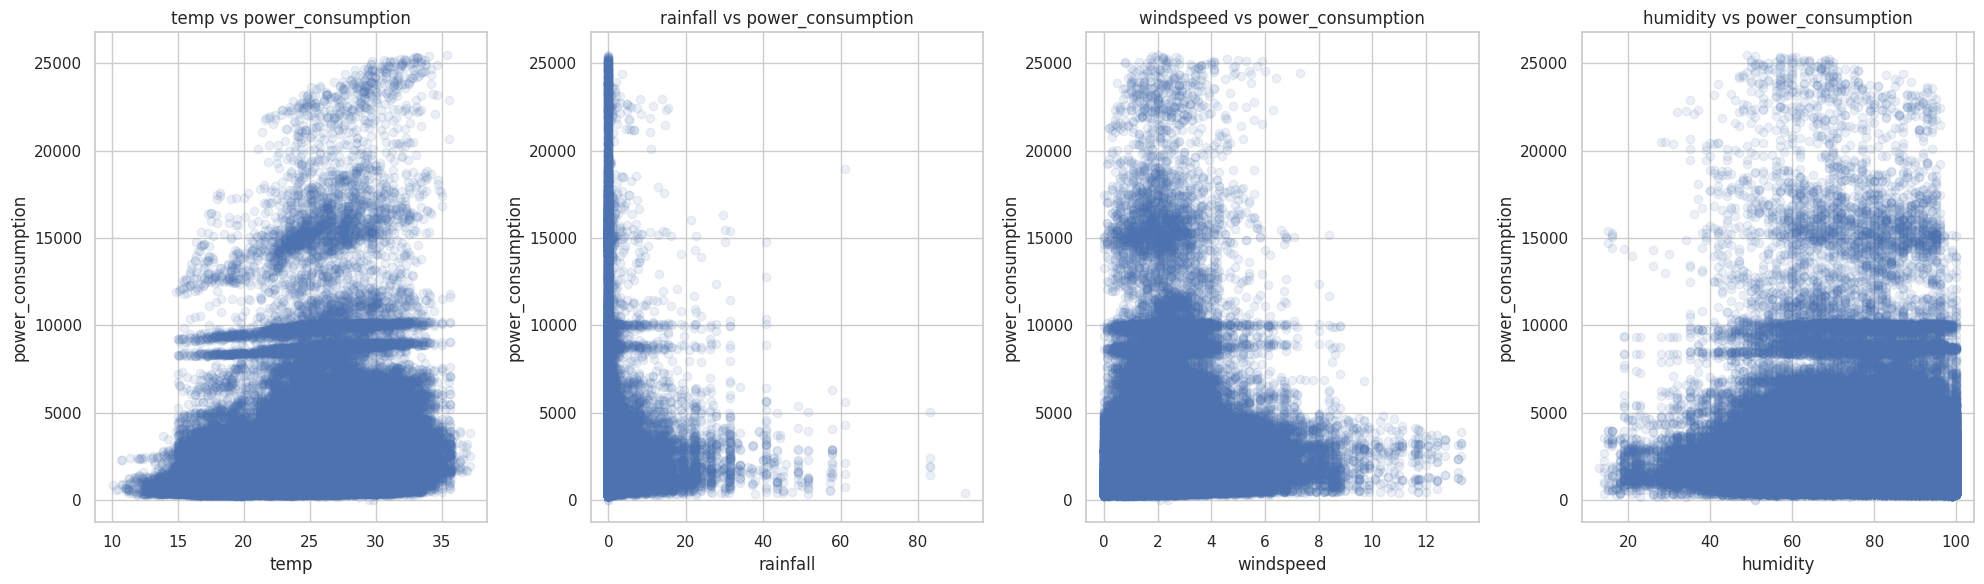

In [45]:
#비선형성 확인
#다 nonlinear함
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter(dataframe, independent_vars, dependent_var, alpha_value=0.1):
    fig, axs = plt.subplots(1, len(independent_vars), figsize=(5 * len(independent_vars), 6))

    for i, ivar in enumerate(independent_vars):
        axs[i].scatter(dataframe[ivar], dataframe[dependent_var], alpha=alpha_value)
        axs[i].set_xlabel(ivar)
        axs[i].set_ylabel(dependent_var)
        axs[i].set_title(f'{ivar} vs {dependent_var}')

    plt.tight_layout()
    plt.show()
plot_scatter(train_df, ['temp', 'rainfall', 'windspeed', 'humidity'], 'power_consumption', alpha_value=0.1)


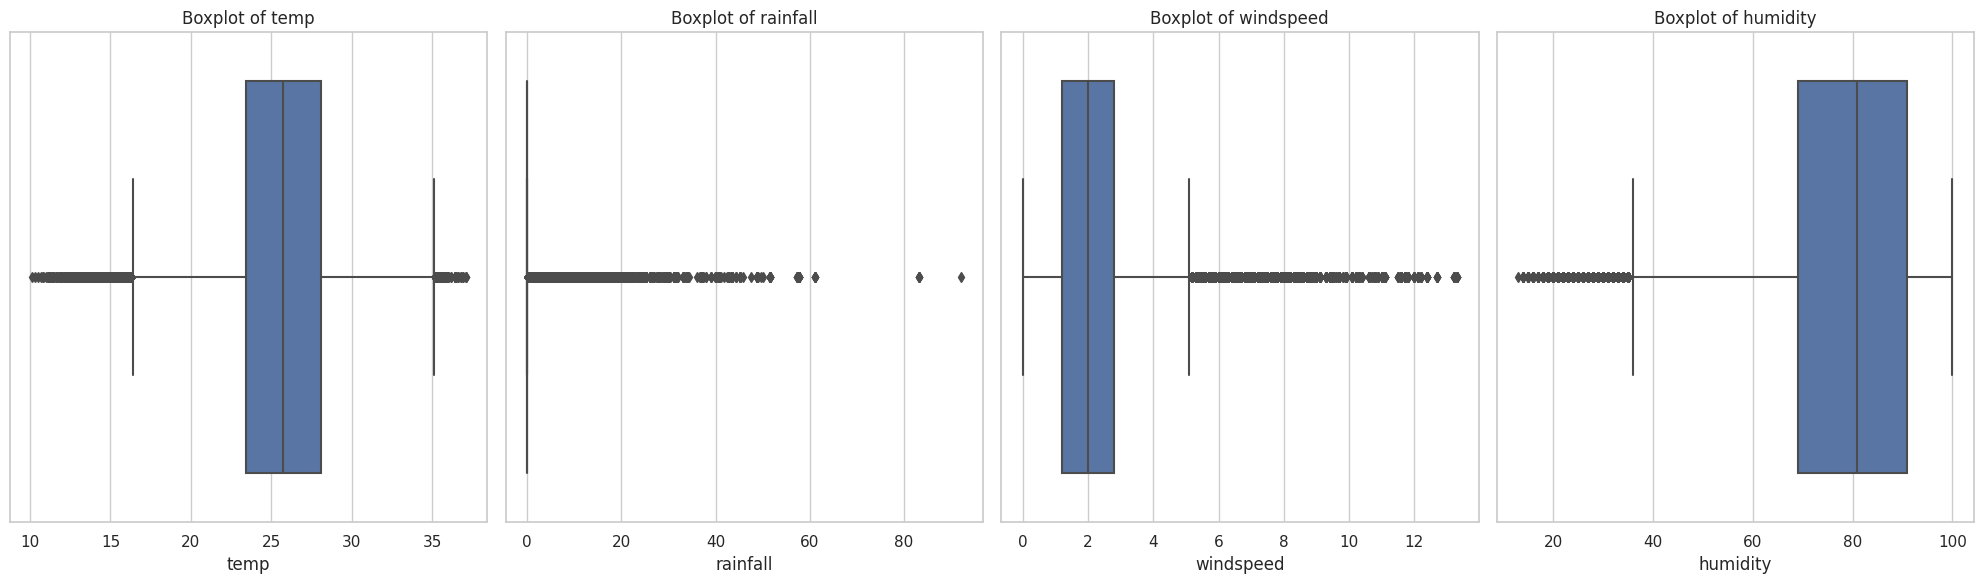

In [46]:
#이상치 확인
def plot_sampled_boxplots(dataframe, independent_vars, dependent_var, sample_size=1000):
    fig, axs = plt.subplots(1, len(independent_vars), figsize=(5 * len(independent_vars), 6))

    for i, ivar in enumerate(independent_vars):
        sns.boxplot(x=dataframe[ivar], ax=axs[i])
        axs[i].set_title(f'Boxplot of {ivar}')

    plt.tight_layout()
    plt.show()
plot_sampled_boxplots(train_df, ['temp', 'rainfall', 'windspeed', 'humidity'], 'power_consumption')
#이상치가 아주 많다.

In [47]:
#비정규, outlier 상당수 존재, 비선형이므로 data의 rank를 이용하여 상관관계 계산
#non-parametric correlation.
#먼저 휴일이 기후와 상관없이 전력사용량이 적어서 holiday를 false/true별로 나눠서 해보자
climate_variables = train_df[train_df['holiday'] == False][['temp', 'rainfall', 'windspeed', 'humidity']]
power_consumption = train_df[train_df['holiday'] == False][['power_consumption']]

for variable in climate_variables.columns:
    correlation, p_value = stats.spearmanr(climate_variables[variable], power_consumption)
    print(f'{variable}와 전력 소비량의 상관계수: {correlation}, p-value: {p_value}')

temp와 전력 소비량의 상관계수: 0.28600057296297426, p-value: 0.0
rainfall와 전력 소비량의 상관계수: -0.00960495955540486, p-value: 0.00034863534055811965
windspeed와 전력 소비량의 상관계수: 0.2281982833246088, p-value: 0.0
humidity와 전력 소비량의 상관계수: -0.2394510416680041, p-value: 0.0


In [48]:
#holiday=true
climate_variables = train_df[train_df['holiday'] == True][['temp', 'rainfall', 'windspeed', 'humidity']]
power_consumption = train_df[train_df['holiday'] == True][['power_consumption']]

for variable in climate_variables.columns:
    correlation, p_value = stats.spearmanr(climate_variables[variable], power_consumption)
    print(f'{variable}와 전력 소비량의 상관계수: {correlation}, p-value: {p_value}')

temp와 전력 소비량의 상관계수: 0.26970902193980123, p-value: 0.0
rainfall와 전력 소비량의 상관계수: 0.02108453715037212, p-value: 6.985454647525632e-08
windspeed와 전력 소비량의 상관계수: 0.19294876681171524, p-value: 0.0
humidity와 전력 소비량의 상관계수: -0.17565338852447385, p-value: 0.0


4개의 기후 변수 다 H0 기각. 모두 p-value가 0.05보다 낮다.
따라서 기후 변수와 전력 생산량 사이에는 통계적으로 유의한 상관관계가 있다고 볼 수 있고 우리는 각 기후 변수와 전력 생산량 사이에 상관관계가 있다는 대립 가설을 받아들일수 있다.



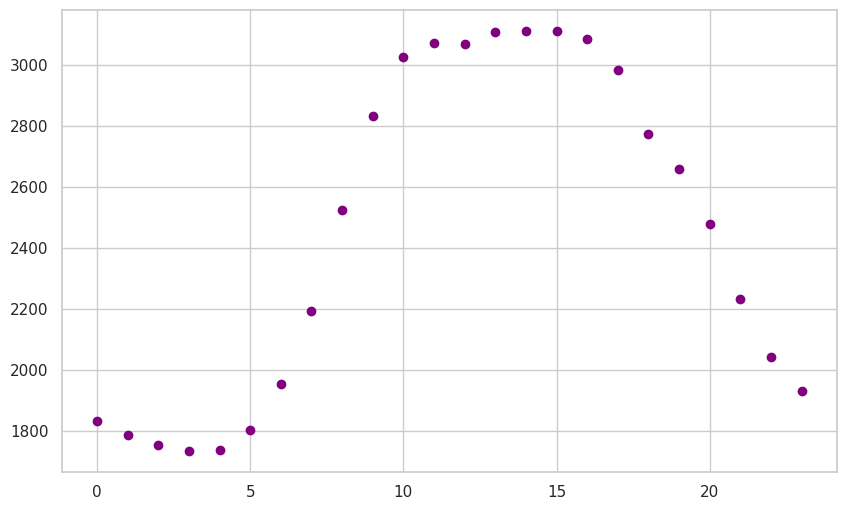

In [49]:
#시간대에 따라 전력사용량이 다른지도 가설 검정
#마찬가지로 조건부터 확인
#비선형성 확인
#다 nonlinear함
hour = list(range(24))
power_consumption = [1832.909812, 1785.853802, 1754.573766, 1735.193839, 1737.142635, 1802.902792, 1955.082864,
                     2193.829010, 2523.012146, 2831.775355, 3026.153066, 3072.319175, 3067.945454, 3107.388915,
                     3110.709623, 3110.862278, 3082.497781, 2982.488583, 2773.693784, 2657.821822, 2477.181846,
                     2232.160672, 2041.831695, 1929.544372]

plt.figure(figsize=(10, 6))
plt.scatter(hour,power_consumption, color='purple', marker='o')
plt.show()


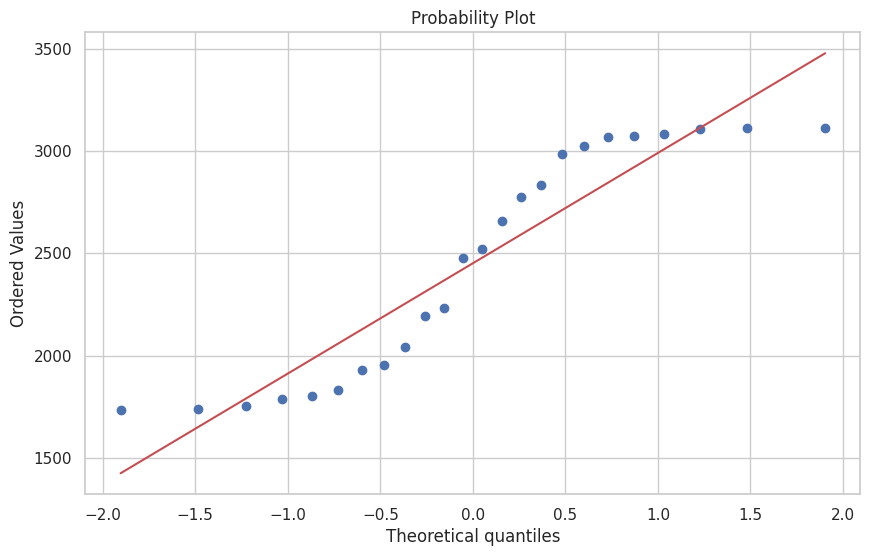

In [50]:
#정규성
plt.figure(figsize=(10, 6))
stats.probplot(power_consumption, dist="norm", plot=plt)
plt.show()
#정규성X

{'whiskers': [<matplotlib.lines.Line2D at 0x7b684bef7910>,
 'caps': [<matplotlib.lines.Line2D at 0x7b684bef76d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b684bef65c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b684bef4a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b684bef58d0>],
 'means': []}

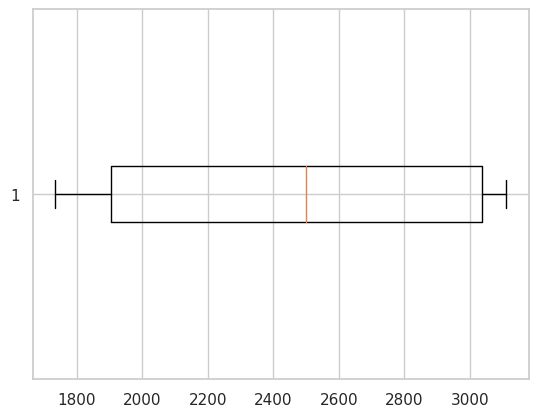

In [53]:
#이상치
plt.boxplot(power_consumption, vert=False)


In [52]:
#정규,선형성이 없으므로 spearmanr사용
#귀무 가설 (H0, Null Hypothesis): 시간대에 따른 전력 사용량의 차이가 없다.
#대립 가설 (H1, Alternative Hypothesis): 시간대에 따른 전력 사용량의 차이가 있다.
spearman_corr, p_value = stats.spearmanr(hour, power_consumption)
print("Spearman 순위 상관 계수:", spearman_corr)
print("p-value:", p_value)
#양의 상관관계
#p-value가 0.018이므로 h0가 기각될 근거가 부족하다.
#결과적으로, 시간대와 전력 사용량 간에 어느 정도 양의 상관 관계가 있으며 시간대가 전력 사용량에 영향을 끼침

Spearman 순위 상관 계수: 0.477391304347826
p-value: 0.01832157146143348
